In [ ]:
Q1.Using sklearn.datasets.load_diabetes apply Variance method 
for removing the constant column also after applying the Variance method
apply multi linear regression on that data 

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes

In [2]:
# Load the diabetes dataset
data= load_diabetes()

In [3]:
# data

In [4]:
data.data                # it will give you independent var

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [5]:
data.feature_names            # it will give iv columns 

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [6]:
y=data.target                   # it will give dependent variable 

In [7]:
df= pd.DataFrame(data=data.data, columns=data.feature_names) # iv dataframe 
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [8]:
df.info()                               # no null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [9]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
X_sel= selector.fit(df)
X_sel

VarianceThreshold()

In [10]:
X_sel.get_support() # all columns are siginificant 

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [11]:
useful_columnNames = df.columns[X_sel.get_support() == True]

In [12]:
useful_columnNames

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

In [13]:
# all the col are significant therefore we are not removing any col 

In [14]:
#import train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.25, random_state=30)

In [16]:
#apply multi linear regression on that data 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
regr = LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_test)
acc=r2_score(y_test,y_pred)
print(f"accuracy score is:{acc}")

accuracy score is:0.523408747228272


In [ ]:
Q2.Using sklearn.datasets.load_wine Apply Correlation and make a heat map using seaborn and
remove the highly correlated columns if exist and the apply SVM and get the best accuracy
by changing the Hyperparameters

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the wine dataset
data= load_wine()
 

In [4]:
# Create a df 
df = pd.DataFrame(data=data.data, columns=data.feature_names) # iv columns 

In [5]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [6]:
data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [7]:
y=data.target # dependent var 

In [8]:
df.info() # our data have Zero null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [9]:
corr_matrix=df.corr() # using corelation 

In [10]:
corr_matrix

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


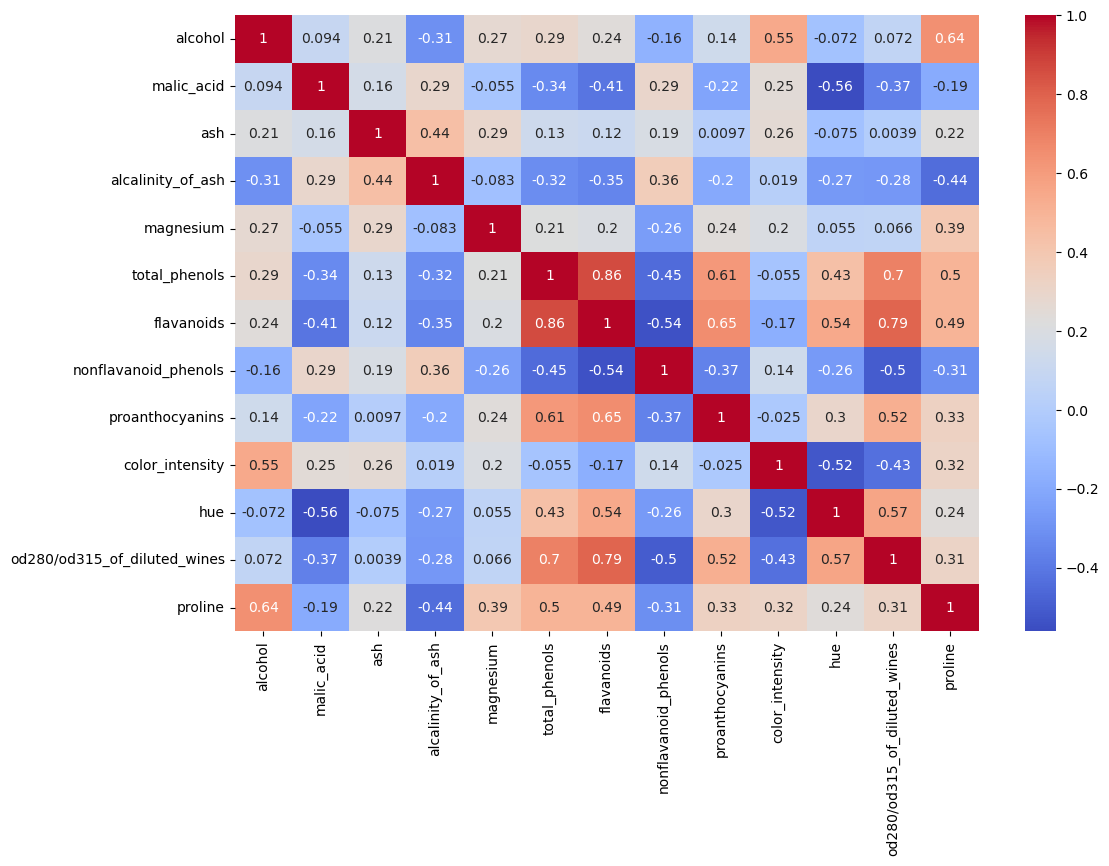

In [11]:
# Create a heatmap using seaborn
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [12]:
for row in range(len(corr_matrix)):
    for col in range(row):
        if abs(corr_matrix.iloc[row][col]) > 0.5:
            print(corr_matrix.iloc[row][col])
            print(corr_matrix.columns[row])
            

0.8645635000951147
flavanoids
-0.5378996119051984
nonflavanoid_phenols
0.6124130837800363
proanthocyanins
0.6526917686075153
proanthocyanins
0.546364195083705
color_intensity
-0.5612956886649447
hue
0.5434785664899897
hue
-0.5218131932287572
hue
0.6999493647911861
od280/od315_of_diluted_wines
0.787193901866951
od280/od315_of_diluted_wines
-0.5032695960789114
od280/od315_of_diluted_wines
0.519067095682523
od280/od315_of_diluted_wines
0.5654682931826589
od280/od315_of_diluted_wines
0.6437200371782134
proline


In [13]:
# to avoid repetation we use set() here

In [14]:
corr_names = set()
for row in range(len(corr_matrix)):
    for col in range(row):
        if abs(corr_matrix.iloc[row][col]) > 0.5:
            corr_names.add(corr_matrix.columns[row])

In [15]:
corr_names # unwanted col 

{'color_intensity',
 'flavanoids',
 'hue',
 'nonflavanoid_phenols',
 'od280/od315_of_diluted_wines',
 'proanthocyanins',
 'proline'}

In [16]:
df.drop(corr_names,axis = 1, inplace=True) # removing of unwanted col

In [17]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols
0,14.23,1.71,2.43,15.6,127.0,2.80
1,13.20,1.78,2.14,11.2,100.0,2.65
2,13.16,2.36,2.67,18.6,101.0,2.80
3,14.37,1.95,2.50,16.8,113.0,3.85
4,13.24,2.59,2.87,21.0,118.0,2.80
...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68
174,13.40,3.91,2.48,23.0,102.0,1.80
175,13.27,4.28,2.26,20.0,120.0,1.59
176,13.17,2.59,2.37,20.0,120.0,1.65


In [26]:
#use train test split 
X_train,X_test,y_train,y_test=train_test_split(df, y, test_size=0.25, random_state=0)

# SVM model with linear 
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred =svc.predict(X_test)
acc=accuracy_score(y_test, y_pred)
print(f"accuracy score is:{acc}")

accuracy score is:0.9333333333333333


In [19]:
# by using diff kernel of SVM

In [30]:
X_train,X_test,y_train,y_test=train_test_split(df, y, test_size=0.3, random_state=0)

# SVM model with rbf 
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)
y_pred =svc.predict(X_test)
acc=accuracy_score(y_test, y_pred)
print(f"accuracy score is:{acc}")

accuracy score is:0.6111111111111112


In [31]:
X_train,X_test,y_train,y_test=train_test_split(df,y, test_size=0.1, random_state=90)

# SVM model with sigmoid
svc = SVC(kernel='sigmoid')
svc.fit(X_train, y_train)
y_pred =svc.predict(X_test)
acc=accuracy_score(y_test, y_pred)
print(f"accuracy score is:{acc}")

accuracy score is:0.4444444444444444


In [32]:
X_train,X_test,y_train,y_test=train_test_split(df,y, test_size=0.2, random_state=50)

# SVM model with polynomial
svc = SVC(kernel='poly')
svc.fit(X_train, y_train)
y_pred =svc.predict(X_test)
acc=accuracy_score(y_test, y_pred)
print(f"accuracy score is:{acc}")

accuracy score is:0.5555555555555556


In [ ]:
Q3.Using sklearn.datasets.load_diabetes apply Mutual info Classification and check 
which are the best columns according to the target column. 
Then Apply decision tree on that data and try to get best accuracy by changing the hyperparameters 


In [33]:
#  diabetes data set from insideAIML portal 

In [1]:
import pandas as pd
import numpy as np



In [2]:
data=pd.read_csv("diabetes (1).csv")

In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
x=data.drop('Outcome',axis=1)

In [7]:
x.columns #independent variable 

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [8]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [9]:
y=data['Outcome'].values # dependent variable

In [10]:
from sklearn.feature_selection import mutual_info_classif

In [23]:
mutual_in_clf=mutual_info_classif(x,y)

In [34]:
mutual_in_clf

array([0.03479353, 0.11087812, 0.0027646 , 0.03603498, 0.04365297,
       0.07082948, 0.0214852 , 0.07451105])

In [35]:
len(mutual_in_clf)

8

In [40]:
len(x.columns)

8

In [44]:
names_independent_var = x.columns

In [45]:
names_independent_var

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [46]:
MIC_ser = pd.Series(mutual_in_clf)

In [47]:
MIC_ser

0    0.034794
1    0.110878
2    0.002765
3    0.036035
4    0.043653
5    0.070829
6    0.021485
7    0.074511
dtype: float64

In [48]:
MIC_ser.index = names_independent_var 

In [49]:
MIC_ser.sort_values(ascending=False)

Glucose                     0.110878
Age                         0.074511
BMI                         0.070829
Insulin                     0.043653
SkinThickness               0.036035
Pregnancies                 0.034794
DiabetesPedigreeFunction    0.021485
BloodPressure               0.002765
dtype: float64

In [52]:
for i in names_independent_var:
    if MIC_ser[i] >= 0.03:
        print(f"name is {i} and significance is {MIC_ser[i]}")

name is Pregnancies and significance is 0.03479353076049585
name is Glucose and significance is 0.11087812363997052
name is SkinThickness and significance is 0.03603497880653772
name is Insulin and significance is 0.04365297016852043
name is BMI and significance is 0.0708294817868449
name is Age and significance is 0.07451104778876605


In [55]:
useful_names = []
for i in names_independent_var:
    if MIC_ser[i] >= 0.03:
        useful_names.append(i)

In [56]:
useful_names 

['Pregnancies', 'Glucose', 'SkinThickness', 'Insulin', 'BMI', 'Age']

In [ ]:
#Then Apply decision tree on that data and try 
#to get best accuracy by changing the hyperparameters 

In [57]:
x1 = x[useful_names].values

In [91]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x1,y,test_size=0.35,random_state=40)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)
accuracy_score(y_test,y_pred)

0.7100371747211895

In [93]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x1,y,test_size=0.2,random_state=55)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dtc = DecisionTreeClassifier(criterion='gini')
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)
accuracy_score(y_test,y_pred)

0.7467532467532467

In [74]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x1,y,test_size=0.35,random_state=30)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dtc = DecisionTreeClassifier(splitter='best')
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)
accuracy_score(y_test,y_pred)

0.7137546468401487

In [100]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x1,y,test_size=0.23,random_state=90)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dtc = DecisionTreeClassifier(splitter='random')
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)
accuracy_score(y_test,y_pred)

0.6779661016949152

In [ ]:
# Again to get best accuracy by changing the hyperparameters 

In [82]:
useful_names1 = []
for i in names_independent_var:
    if MIC_ser[i] >= 0.04:
        useful_names1.append(i)

In [83]:
useful_names1 

['Glucose', 'Insulin', 'BMI', 'Age']

In [84]:
x2 = x[useful_names1].values

In [89]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x2,y,test_size=0.25,random_state=40)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)
accuracy_score(y_test,y_pred)

0.7395833333333334

In [ ]:
Q4.Using sklearn.datasets.load_boston apply Mutual info Regression and check which are the best
columns according to the target column. Then Apply MultiLinear Regression on that data 
and try to get best accuracy by changing the hyperparameters


In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

In [2]:
#Loading the dataset
data = load_boston()

C:\Users\Jayraj\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset 

In [106]:
# data

In [3]:
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [4]:
data.data          #independent variable values


array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [5]:
#independent variable columns names
data.feature_names 

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
y=data.target          # depdendent var 

In [7]:
df = pd.DataFrame(data.data,columns=data.feature_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [8]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [10]:
df.shape

(506, 13)

In [11]:
y.shape

(506,)

In [12]:
from sklearn.feature_selection import mutual_info_regression

In [13]:
MIR= mutual_info_regression(df,y)

In [14]:
MIR

array([0.33918823, 0.18825143, 0.4644656 , 0.00737778, 0.46780596,
       0.52567893, 0.31234713, 0.2983308 , 0.21298855, 0.35911339,
       0.43795437, 0.15046745, 0.67056657])

In [15]:
len(MIR)

13

In [17]:
len(df.columns)

13

In [18]:
names_independent_var = df.columns

In [19]:
names_independent_var

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [20]:
MIR_ser = pd.Series(MIR)

In [21]:
MIR_ser 

0     0.339188
1     0.188251
2     0.464466
3     0.007378
4     0.467806
5     0.525679
6     0.312347
7     0.298331
8     0.212989
9     0.359113
10    0.437954
11    0.150467
12    0.670567
dtype: float64

In [22]:
MIR_ser.index = names_independent_var 

In [23]:
MIR_ser.sort_values(ascending=False)

LSTAT      0.670567
RM         0.525679
NOX        0.467806
INDUS      0.464466
PTRATIO    0.437954
TAX        0.359113
CRIM       0.339188
AGE        0.312347
DIS        0.298331
RAD        0.212989
ZN         0.188251
B          0.150467
CHAS       0.007378
dtype: float64

In [24]:
for i in names_independent_var:
    if MIR_ser[i] >= 0.2:
        print(f"name is {i} and significance is {MIR_ser[i]}")
    
      

name is CRIM and significance is 0.3391882251396412
name is INDUS and significance is 0.46446559929597075
name is NOX and significance is 0.46780596199490576
name is RM and significance is 0.5256789321022248
name is AGE and significance is 0.3123471288517856
name is DIS and significance is 0.298330799978213
name is RAD and significance is 0.21298854915311605
name is TAX and significance is 0.35911338663949577
name is PTRATIO and significance is 0.4379543722465815
name is LSTAT and significance is 0.6705665673234207


In [25]:
useful_names = []
for i in names_independent_var:
    if MIR_ser[i] >= 0.2:
        useful_names.append(i)

In [26]:
useful_names 

['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']

In [27]:
x1 = df[useful_names].values

In [ ]:
# Apply MultiLinear Regression on that data 
# try to get best accuracy by changing the hyperparameters

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x1,y,test_size=0.3,random_state=40)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
r2_score(y_pred,y_test)

0.5965177273373068

In [30]:
useful_names1 = []
for i in names_independent_var:
    if MIR_ser[i] >= 0.3:
        useful_names1.append(i)

In [31]:
useful_names1

['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'TAX', 'PTRATIO', 'LSTAT']

In [32]:
x2= df[useful_names1].values

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x2,y,test_size=0.25,random_state=40)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
r2_score(y_pred,y_test)

0.5554856172668514

In [ ]:
# 0.35

In [34]:
useful_names2 = []
for i in names_independent_var:
    if MIR_ser[i] >= 0.35:
        useful_names2.append(i)

In [35]:
x3= df[useful_names2].values

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x3,y,test_size=0.25,random_state=80)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
r2_score(y_pred,y_test)

0.6413661428297635